# Personal Finance Tracker with Python and Data Visualization

This project demonstrates a simple yet effective personal finance tracker built using Python. It allows users to record income and expense transactions, categorize them, and visualize their financial habits through interactive charts.

**Note:** This project was developed with guidance and step-by-step assistance from Google's Gemini AI. Leveraging AI for learning and development helped in structuring the project, understanding concepts, and debugging.

**Skills Demonstrated:**
- Python Programming (Intermediate)
- Data Manipulation with Pandas
- Data Visualization with Matplotlib and Seaborn
- File I/O (reading from/writing to CSV)
- Using Google Colab for development
- Resourcefulness in utilizing AI tools for learning and development

**Purpose:** To provide clear insights into personal spending and income patterns, helping with financial management.

## 1. Setting Up the Environment and Data Access

This section initializes the Google Colab environment and establishes a connection to Google Drive. This allows the notebook to read from and write to our `transactions.csv` file, ensuring data persistence.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Loading Transaction Data

Here, we use the Pandas library to load our financial transaction data from the `transactions.csv` file into a powerful data structure called a DataFrame. A DataFrame is essentially a table in Python, ideal for data manipulation and analysis.

In [ ]:
import pandas as pd
import os

csv_file_path = '/content/drive/MyDrive/Colab Notebooks/FinanceTracker/Transactions.csv'

if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print("Data loaded successfully into a DataFrame!")
else:
    print(f"Error: The file was NOT found at this path: {csv_file_path}")
    df = pd.DataFrame(columns=['Date', 'Type', 'Category', 'Description', 'Amount'])
    print("An empty DataFrame has been created.")

print(df.head())
print(df.info())

Data loaded successfully into a DataFrame!
         Date     Type   Category             Description   Amount
0  2024-01-05   Income     Salary        Monthly Paycheck  3500.00
1  2024-01-06  Expense       Rent  Monthly Apartment Rent  1200.00
2  2024-01-08  Expense       Food        Weekly Groceries    85.50
3  2024-01-10  Expense  Transport        Monthly Bus Pass    50.00
4  2024-01-12  Expense  Utilities        Electricity Bill    70.25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         51 non-null     object 
 1   Type         51 non-null     object 
 2   Category     51 non-null     object 
 3   Description  51 non-null     object 
 4   Amount       51 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.1+ KB
None


## 3. Adding and Persisting New Transactions

This function allows us to input new income or expense transactions. Crucially, after adding a transaction to the DataFrame, it is immediately saved back to the `transactions.csv` file on Google Drive, ensuring our financial records are always up-to-date and persistent across sessions.

In [ ]:
import datetime
import pandas as pd

def add_transaction(dataframe, trans_type, amount, category, description="", date=None):
    if date is None:
        date = datetime.date.today().isoformat()

    new_row = pd.DataFrame([{
        'Date': date,
        'Type': trans_type,
        'Category': category,
        'Description': description,
        'Amount': float(amount)
    }])

    dataframe = pd.concat([dataframe, new_row], ignore_index=True)

    dataframe.to_csv(csv_file_path, index=False)
    print(f"Transaction added and saved: {trans_type} {amount} ({category})")
    return dataframe

df = add_transaction(df, 'Expense', 50.0, 'Food', 'Dinner with friends')
df = add_transaction(df, 'Income', 1000.0, 'Freelance', 'Web design project')
df = add_transaction(df, 'Expense', 20.0, 'Entertainment', 'Movie ticket', date='2025-07-22')

print(df.tail())

Transaction added and saved: Expense 50.0 (Food)
Transaction added and saved: Income 1000.0 (Freelance)
Transaction added and saved: Expense 20.0 (Entertainment)
          Date     Type       Category          Description  Amount
49  2024-06-22  Expense           Food              Takeout    28.0
50  2024-06-28  Expense       Shopping     Gadget Accessory    40.0
51  2025-07-26  Expense           Food  Dinner with friends    50.0
52  2025-07-26   Income      Freelance   Web design project  1000.0
53  2025-07-22  Expense  Entertainment         Movie ticket    20.0


## 4. Data Cleaning and Preprocessing

Before analyzing and visualizing the data, it's essential to ensure it's in the correct format. This section converts the 'Date' column to proper datetime objects and the 'Amount' column to numeric (float) values. It also sorts the data chronologically, which is vital for time-series analysis.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Amount'] = pd.to_numeric(df['Amount'])
df = df.sort_values(by='Date').reset_index(drop=True)

print("--- DataFrame dtypes after conversion and sorting: ---")
print(df.info())
print("\n--- First 5 rows of sorted DataFrame: ---")
print(df.head())

--- DataFrame dtypes after conversion and sorting: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         54 non-null     datetime64[ns]
 1   Type         54 non-null     object        
 2   Category     54 non-null     object        
 3   Description  54 non-null     object        
 4   Amount       54 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.2+ KB
None

--- First 5 rows of sorted DataFrame: ---
        Date     Type   Category             Description   Amount
0 2024-01-05   Income     Salary        Monthly Paycheck  3500.00
1 2024-01-06  Expense       Rent  Monthly Apartment Rent  1200.00
2 2024-01-08  Expense       Food        Weekly Groceries    85.50
3 2024-01-10  Expense  Transport        Monthly Bus Pass    50.00
4 2024-01-12  Expense  Utilities        Electricity

## 5. Financial Data Visualization

This is where we transform raw numbers into insightful visuals using Matplotlib and Seaborn. The charts below provide a quick overview of spending habits and financial progress.

### Expense Distribution by Category (Pie Chart)
This pie chart clearly shows the proportion of spending across different expense categories, helping to identify major spending areas.

### Monthly Income vs. Expenses (Bar Chart)
This bar chart compares total income and total expenses for each month, making it easy to see monthly cash flow and financial health.

### Cumulative Balance Over Time (Line Graph)
This line graph tracks the overall financial balance (income minus expenses) over time, offering a clear visual trend of financial growth or decline.

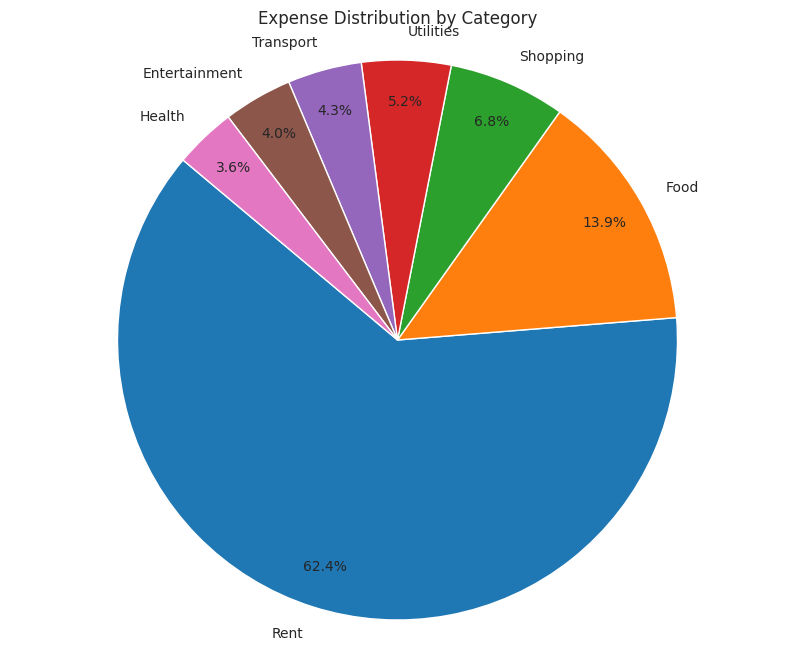

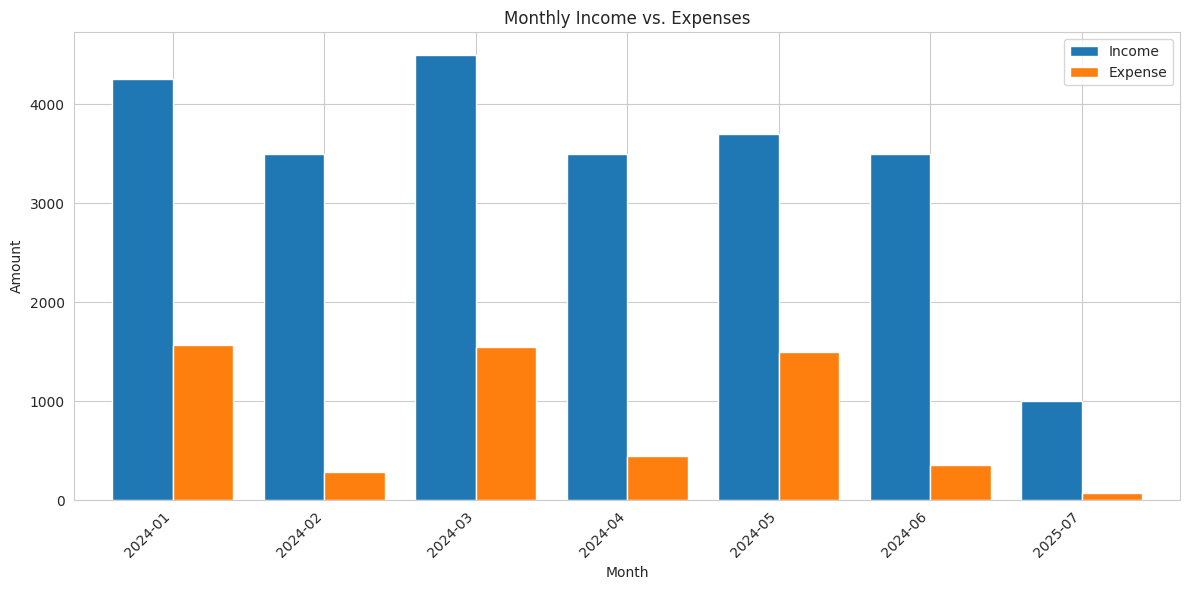

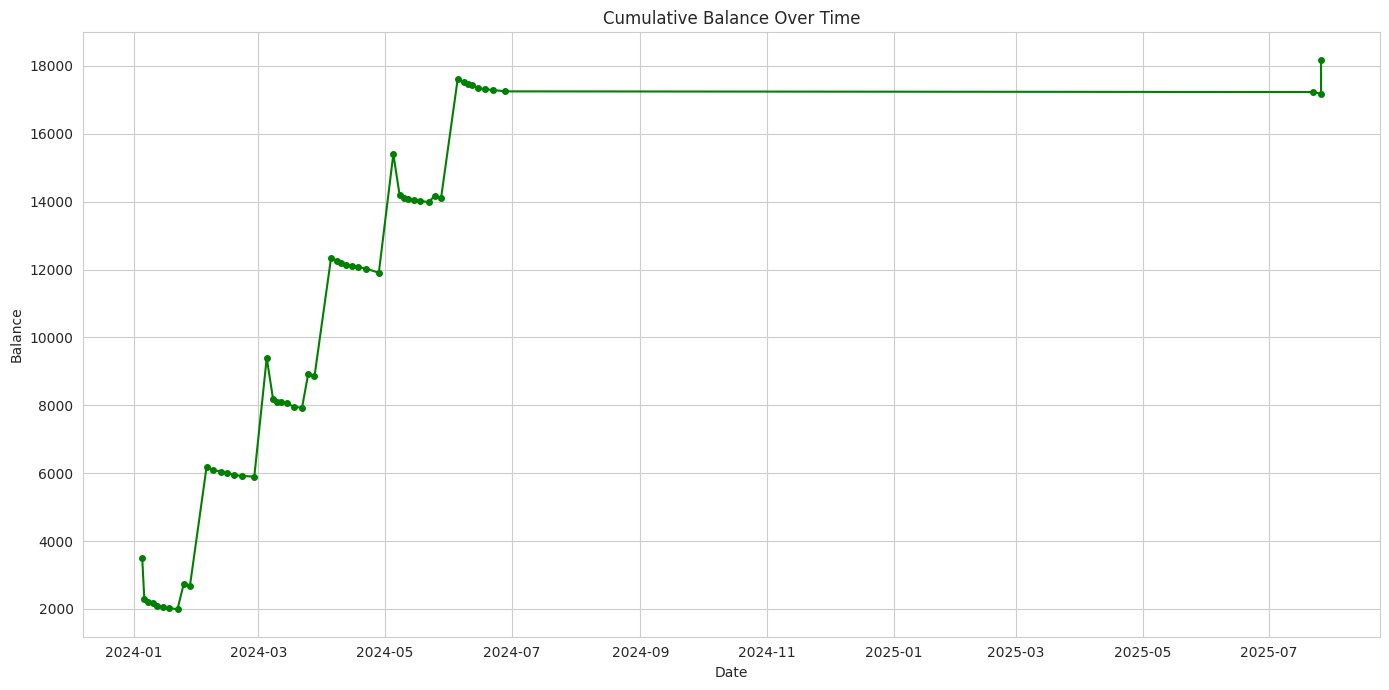

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")

expenses_df = df[df['Type'] == 'Expense']

if not expenses_df.empty:
    category_expenses = expenses_df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    plt.pie(category_expenses,
            labels=category_expenses.index,
            autopct='%1.1f%%',
            startangle=140,
            pctdistance=0.85)
    plt.title('Expense Distribution by Category')
    plt.axis('equal')
    plt.show()
else:
    print("No expense data available to create a pie chart.")

df['Month'] = df['Date'].dt.to_period('M')
monthly_summary = df.groupby(['Month', 'Type'])['Amount'].sum().unstack(fill_value=0)

if not monthly_summary.empty:
    plt.figure(figsize=(12, 6))
    monthly_summary[['Income', 'Expense']].plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.title('Monthly Income vs. Expenses')
    plt.xlabel('Month')
    plt.ylabel('Amount')
    plt.xticks(rotation=45, ha='right')
    plt.legend(['Income', 'Expense'])
    plt.tight_layout()
    plt.show()
else:
    print("No monthly summary data available to create a bar chart.")

if not df.empty:
    df['signed_amount'] = df.apply(lambda row: row['Amount'] if row['Type'] == 'Income' else -row['Amount'], axis=1)
    df['cumulative_balance'] = df['signed_amount'].cumsum()

    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['cumulative_balance'], marker='o', linestyle='-', color='green', markersize=4)
    plt.title('Cumulative Balance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Balance')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available to create a balance over time chart.")